<a href="https://colab.research.google.com/github/rpdieego/Kaggle_Titanic/blob/master/Titanic_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Kaggle Competitions - Titanic: Machine Learning from Disaster



[Click here to check the related page on Kaggle for this challenge](https://www.kaggle.com/c/titanic)

# Step 1 - Defining the Problem

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Goal**

The goal of this challenge is to build a predictive model that answers the question: "what sorts o people were more likely to survive to the Titanic accident?" based on passenger data (example given: gender, socio-economic class, etc).

**Performance Metrics**

The score is based on the number of accurate predictions the model have got. In other words, only the accuracy of the model is considered in this challenge.



# Step 2 - Obtaining the Data

The dataset for this challenge were already provided in two different groups:



*   Training Dataset (train.csv) - Used to build and train the ML model. This dataset informs if the passenger has died or not.

*   Test Dataset (test.csv) - Used to validate the ML model. This dataset does not inform if the passenger has died or not.





In [2]:
# import relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

# Opening the Dataframes using Pandas

url_train = 'https://raw.githubusercontent.com/rpdieego/Kaggle_Titanic/master/train.csv'
url_test = 'https://raw.githubusercontent.com/rpdieego/Kaggle_Titanic/master/test.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

# Checking the dimensions of the Datasets

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(train.shape[1], train.shape[0]))
print("\n")
print("Test Dataset \n Variables:\t{}\n Inputs:\t{}".format(test.shape[1], test.shape[0]))

Train Dataset 
 Variables:	12
 Inputs:	891


Test Dataset 
 Variables:	11
 Inputs:	418


# Step 3 - Exploring the Data

**Data Dictionary**



*   *Passenger ID* - Passengers Identification [**PRIMARY KEY**]
*   *Survived* - Informs if the passenger has died or not. [**TARGET VARIABLE**]
    *   0 = Passenger not survided
    *   1 = Passenger survived
*   *Pclass* - Passenger ticket class [**DISCRETE NUMERIC**]
    *   1 = First Class (Upper Class)
    *   2 = Second Class (Middle Class)
    *   3 = Third Class (Lower Class)
*   *Name* - Passenger`s name [**CATEGORIC**]
*   *Sex* - Passenger`s sex [**CATEGORIC**]
*   *Age* - Passenger`s age [**CONTINUOUS NUMERIC**]
*   *SibSp* - Quantity of spouses / sibblings aboard the Titanic [**DISCRETE NUMERIC**]
*   *Parch* - Quantity of parents / children aboard the Titanic [**DISCRETE NUMERIC**]
*   *Ticket* - Ticket number [**CATEGORIC**]
*   *Fare* - Passenger fare [**CONTINUOUS NUMERIC**]
*   *Cabin* - Passenger Cabin [**CATEGORIC**]
*   *Embarked* - Port of Embarkation [**CATEGORIC**]
    *   C = Cherbourg
    *   Q = Queenstown
    *   S = Southampton






In [3]:
# identifying the type of each variable
display(train.dtypes)

# displaying the training dataset head
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing Values**

Only three of the variables o the dataset have missing values:

*   Cabin - ~ 77% of the values are missing
*   Age - ~ 20% of the values are missing
*   Embarked - ~ 0.2% of the values are missing


In [4]:
# percentage o missing values

(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

**Data Distribution - Numeric Variables**



In [5]:
# Statistical Description of the Data

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


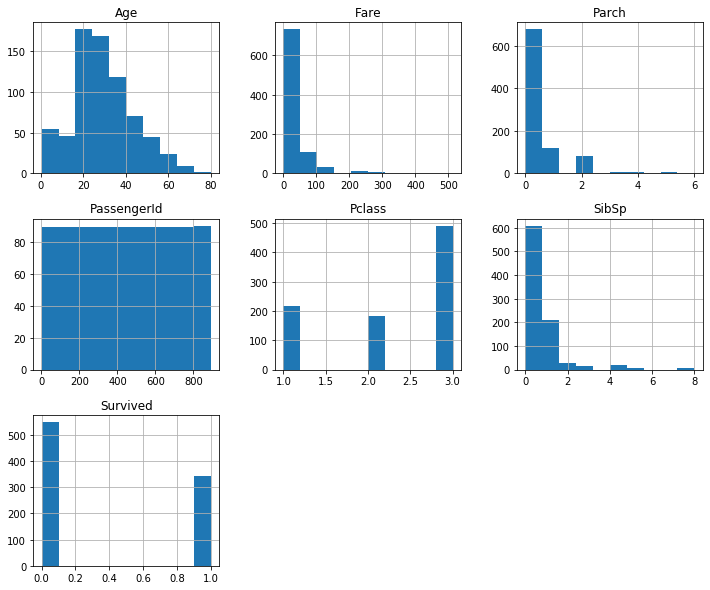

In [6]:
# Numerical Variables Histogram
train.hist(figsize=(12,10));

In [7]:
# Statistical Description for the Data

train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Landergren, Miss. Aurora Adelia",male,1601,G6,S
freq,1,577,7,4,644


**General Analysis**

How are the other variables related to the "Survived" variable?

*Questions for potential hypothesis:*

*   "Women and children first!" as we have seen in the movie really happened? Or who was closer to the emergency boats had the priority?
*   People from higher classes had the priority to leave the sinking vessel?
*   The city where the passenger had embarked had any influence?



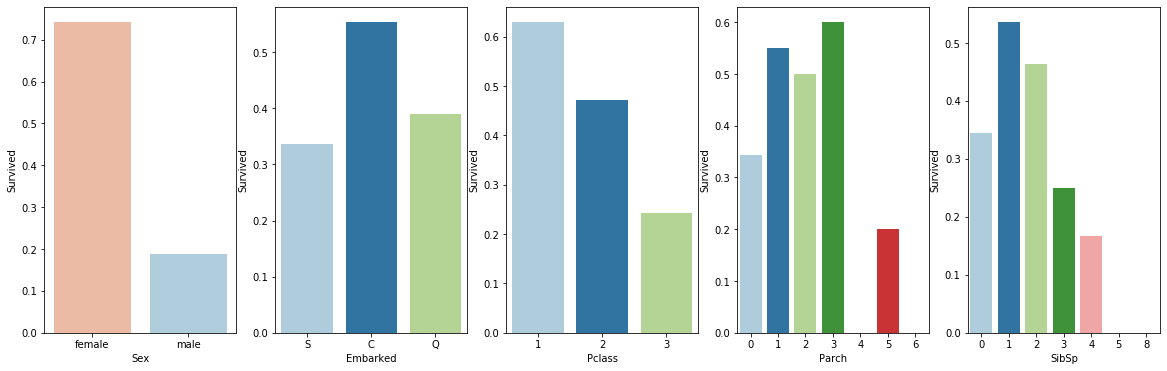

In [8]:
# Plotting graphs for variable relation analysis (Sex, Embarked and Pclass)

fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1,5, figsize=(20,6))

sns.barplot(x='Sex',y='Survived',data=train, ax=axis1, order=["female","male"],ci=None,palette="RdBu",)
sns.barplot(x='Embarked',y='Survived',data=train, ax=axis2,ci=None,palette="Paired")
sns.barplot(x='Pclass',y='Survived',data=train, ax=axis3,ci=None,palette="Paired")
sns.barplot(x='Parch',y='Survived',data=train, ax=axis4,ci=None,palette="Paired")
sns.barplot(x='SibSp',y='Survived',data=train, ax=axis5,ci=None,palette="Paired")

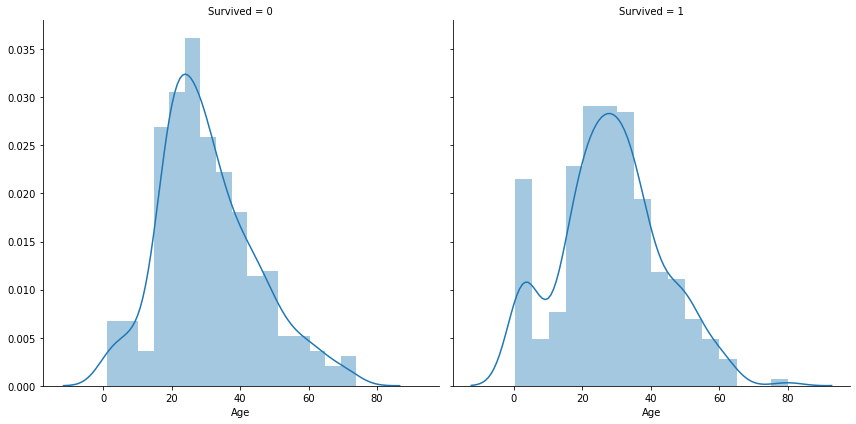

In [9]:
# Plotting graphs for variable relation analysis (Age)

age_survived = sns.FacetGrid(train, col='Survived', height= 6)
age_survived.map(sns.distplot, 'Age')

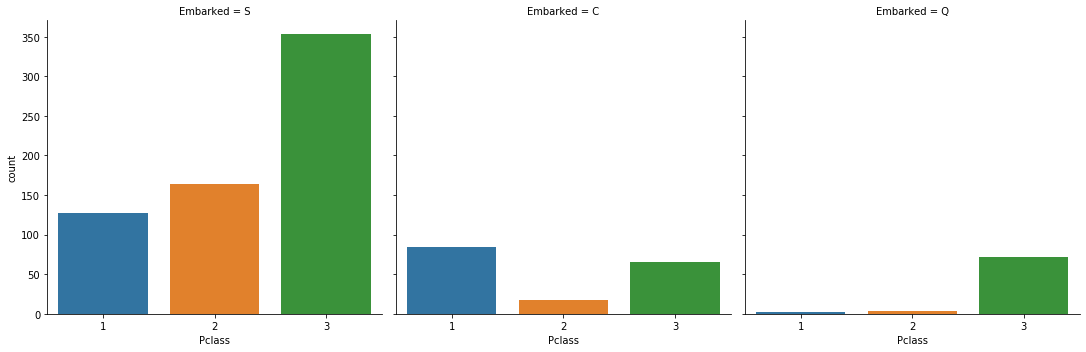

In [30]:
# Plotting graphs for variable relation analysis (City embarked x Class)

embarked_pclass = sns.catplot(x='Pclass',col='Embarked', data=train, kind="count",)

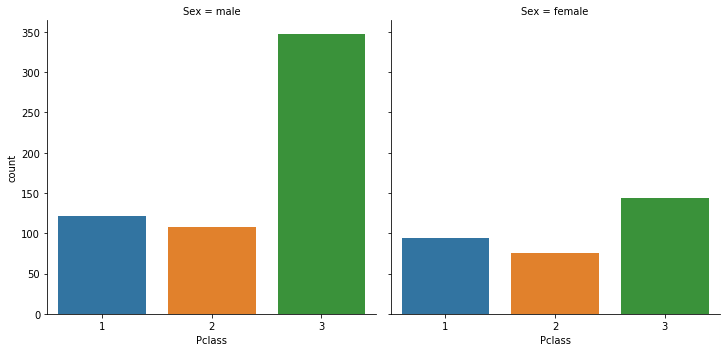

In [32]:
# Plotting graphs for variable relation analysis (Pclass x Sex)

embarked_pclass = sns.catplot(x='Pclass',col='Sex', data=train, kind="count",)

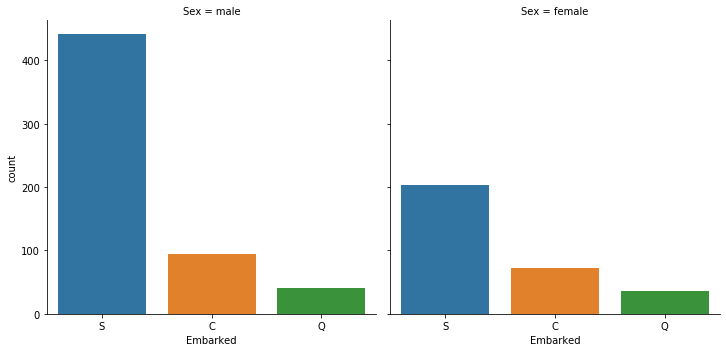

In [33]:
# Plotting graphs for variable relation analysis (Sex x Embarked)

sex_pclass = sns.catplot(x='Embarked',col='Sex', data=train, kind="count",)

# Step 4 - Preprocessing the Data

Into this step, we are going to merge both train and test dataframes in order to preprocess all the data at once.

As soon as the preprocessment is done, we are going to split these dataframes once again.

In [0]:
# Saving datasets indexes

train_idx = train.shape[0]
test_idx = test.shape[0]

# Saving PassengerID for Kaggle submission template
passengerId = test['PassengerId']

# Removing 'Survived' Column from train dataset before merging all the data
target = train.Survived.copy()
train.drop(['Survived'], axis=1, inplace=True)

# Merging both datasets

merged_df = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)






In [12]:
merged_df.shape

(1309, 11)

**Selecting Features**

Some of the variables seem to add no information to our predictions, so we`re going to exclude them from our dataset:

*   *PassengerID* - Just a identification, no information added
*   *Name* - We could see that passenger register had a different name, so it`s not going to help us on our predictions
*   *Ticket* - Relevant information from this variable shall be included in the Parch and SibSp variables
*   *Cabin* - Relevant information from this variable shall be included in the Parch and SibSp variables





In [0]:
# Dropping the features which we judged not to be relevant

merged_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

**Missing Values**

We need now to deal with the missing values from the features we had chosen

In [14]:
# Counting missing values

merged_df.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

The only variables which need some action are:

*   *Age* -> We are going to fill the missing values with median
*   *Fare* -> We are going to fill the missing value with the median
*   *Embarked* -> We are going to fill the missing value with the most frequent value

In [0]:
# Replacing "Age" missing values

median_age = merged_df['Age'].median()
merged_df['Age'].fillna(median_age, inplace=True)

# Replacing "Fare" missing values

median_fare = merged_df['Fare'].median()
merged_df['Fare'].fillna(median_fare, inplace=True)

# Replacing "Embarked" missing values

mostfreq_embarked = merged_df['Embarked'].value_counts()[:1]
merged_df['Embarked'].fillna(mostfreq_embarked, inplace=True)



**Preparing the variables for the model**

As we need to work with numeric variables in our prediction model, there are two variables which some work:

*   Sex -> As it has only two possible values "male" and "female", we are going to convert into '0' and '1', respectively;
*   Embarked -> For this one, we need to create 2 Dummie Variables (As we have 3 possible values)

*We should always use N-1 Dummie Variables, where N is the number of possible caterogies for the original categorical variable, in order to avoid multicolinearity in our dataset.*

Please find some more information about colinearity, and how it can affect our analysis in the link below:

[Multicolinearity - Difinition, Causes and Exammples](https://www.statisticshowto.datasciencecentral.com/multicollinearity/)



In [16]:
# Preparing the 'Sex' variable:

merged_df['Sex'] = merged_df['Sex'].map({'male' : 0, 'female' : 1})


# Preparing the Dummie Variables for 'Embarked'

embarked_dummies = pd.get_dummies(merged_df['Embarked'], prefix='Embarked', drop_first=True)
merged_df = pd.concat([merged_df, embarked_dummies], axis=1)
merged_df.drop('Embarked', axis=1, inplace=True)

# Displaying the head of our new Dataset
display(merged_df.head())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1


**Splitting train and test datasets once again**

As we are done with our preprocessing, we shall split once again our train and test datasets:

In [0]:
# Splitting the datasets using the indexes we saved

preprocessed_train = merged_df.iloc[:train_idx]
preprocessed_test = merged_df.iloc[train_idx:]

In [18]:
preprocessed_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,28.0,1,2,23.4500,0,1
889,1,0,26.0,0,0,30.0000,0,0


# Step 5 - Building our Model



As our target variable is discrete numeric and has only two possible values ( '0' for not survived and '1' for survived), a logistic regression model would suit us well:

In [19]:
# Creating the Logistic Regression Model

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(preprocessed_train, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

y_hat = lr_model.predict(preprocessed_train)

confusion_matrix(target, y_hat, labels=None, sample_weight=None, normalize= 'true')


array([[0.86520947, 0.13479053],
       [0.30116959, 0.69883041]])

**Checking the Accuracy of the Model**

Now, we need to check for the accuracy of our model when predicting the survivors from Titanic using the training set.

In [21]:
# checking the accuracy

acc_logReg = round(lr_model.score(preprocessed_train, target) * 100, 2)
print("Accuracy of the Logistic Regression Model: {} %".format(acc_logReg))

Accuracy of the Logistic Regression Model: 80.13 %


# Step 6 - Validating Our Results

As the testing dataset Kaggle provided us doesn`t include the variable 'Survived', the validation is going to be madle directly by Kaggle when we submit our results in the desirable format:


In [0]:
# Generating prediction with the test dataset

y_predicted = lr_model.predict(preprocessed_test)

submission_df = pd.DataFrame ({"PassengerId": passengerId,"Survived": y_predicted})

# Generating the .csv file for submission

submission_df.to_csv('./submission.csv', index=False)

By submiting our predition into the Kaggle website, we had the the following result:

![Kaggle Submission Result](https://github.com/rpdieego/Kaggle_Titanic/blob/master/Submission_Kaggle.JPG?raw=true)

As we can see, the accuracy of our prediction on the test dataset is quite lower than what we have reached during the training, which is quite understandable and expected.

*   **Training Accuracy: 80.13 %**
*   **Testing Accuracy: 74.64%**

# Section 7 - Conclusions and interesting points for future projects

From the given data, we have the following insights:

*   The number of women which has survived to the accident were significantly higher than the number of men.
*   The distribution of the survivor`s age tell with that peak on the left tail that children have been given priority during the rescue procedure.

**Hence, the adaptation of James Cameron to the movies were not so far from the reality, right?**

*   We could also see that people which were at the first and second classes had also more succes to escape from the sinking vessel, which could indicate that their cabins were closer to the escape path or some priority were given to then during the procedure. However, it`s also been shown that the third class were the most unbalanced between all of them in terms of sex distribution (approximately 70% of the passengers of the third class were male), and as the "Women and Children first!" procedure showed to really have happened, this hypothesis needs to be discarted.

*   Also the embarking city shows to have no relevance no significant impact wheter the passenger survives or not, as the number of survivors from each city port is strongly correlated to the sex and class tickets of people whom have onboarded there.



**And how could we improve our predictions results?**

*74.64 % of accuracy is not bad at all, but could we have done it better?*

Here are some possible procedures we could run in order to try to get higher accuracy results:

*   Test some other models, as a decision tree or even a deep neural network;
*   Standardize the numeric data during the preprocessing step;
*   Adding or removing some features from our dataset, as 'Embarked' for example, which seems to be strongly correlated to Sex and Pclass when we look at the survivors;
